In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import requests
import datetime
import matplotlib.pyplot as plt
# import plotly.graph_objects as go
import plotly.offline as py
import plotly
from plotly.offline import init_notebook_mode
from plotly import graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

#serie de mares de ubatuba em 1981
link = "https://www.ime.usp.br/~pam/m-ubatuba.76.85"
f = requests.get(link)

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval

a = f.text.split("\n")
a = a[1:-1]
a = [i.strip() for i in a]
a = list(map(float, a))

n = len(a) # length of the signal

# df.set_index('year',inplace=True)
ts_temperature = np.array(a)
print(ts_temperature)

[27.1 25.3 25.8 23.7 21.6 20.  19.3 20.2 20.2 21.3 23.7 25.5 26.4 27.4
 26.3 23.8 22.3 20.8 22.6 21.6 21.6 22.5 23.3 24.1 25.9 25.8 25.5 22.9
 21.5 19.8 21.4 20.8 21.8 22.3 23.7 24.7 24.  25.3 24.2 23.2 22.3 19.6
 19.2 21.7 20.5 22.5 22.5 24.5 26.1 26.6 27.7 24.4 23.  20.5 20.1 20.3
 19.7 21.5 22.6 25.6 25.9 27.  24.7 22.9 22.3 19.9 19.  20.2 21.4 20.7
 23.4 23.8 24.3 25.9 23.7 22.1 20.1 20.3 20.3 20.8 20.8 21.5 24.3 23.8
 26.4 26.6 23.5 18.9 18.  15.3 14.7 14.4 16.2 19.9 22.6 23.3 25.6 25.6
 23.3 19.1 19.4 20.1 19.  19.  18.3 22.  22.5 23.1 23.8 26.2 25.1 24.5
 21.6 19.8 19.8 20.1 20.2 22.2 22.9 23.9]


In [2]:
from scipy import signal
import matplotlib.pyplot as plt
fs = 1 # sampling rate
x = ts_temperature
print("**********************************************************************")
print(f"Gráfico da série")
print("**********************************************************************")
data=[go.Scatter(x=np.arange(n), y=ts_temperature, mode='lines')]
layout = go.Layout(
    title='Série de temperaturas médias mensais de Ubatuba, SP, de janeiro de 1976 a dezembro de 1985',
    xaxis={'title':'Mês'},
    yaxis={'title':'Temperatura [Celsius]'}
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**********************************************************************
Gráfico da série
**********************************************************************


**********************************************************************
Autocorrelação Amostral
**********************************************************************


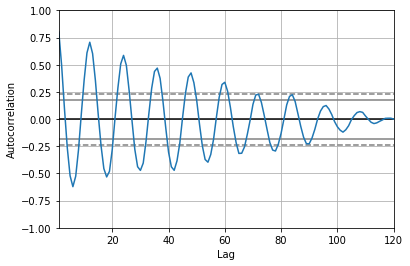

In [3]:
print("**********************************************************************")
print(f"Autocorrelação Amostral")
print("**********************************************************************")
pd.plotting.autocorrelation_plot(ts_temperature);

In [4]:
print("**********************************************************************")
print(f"Periodograma")
print("**********************************************************************")
freq, espectro = signal.periodogram(x, fs)
data=[go.Scatter(x=freq, y=espectro, mode='lines')]
layout = go.Layout(
    title='Periodogram of Temperature in Ubatuba',
    xaxis={'title':'Frequency'},
    yaxis={'title':'Spectrum'}
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
index_greatest = np.where(espectro == max(espectro))[0]
print(f"PICOS DO PERIODOGRAMA - Frequências que mais contribuem com a periodicidade da série:")
print(f"Maior Pico: {max(espectro)} em frequência: {freq[index_greatest]} | período = {1/freq[index_greatest]} meses")
tmp_pico = max(espectro)
tmp_index_greatest = index_greatest
espectro[index_greatest] = 0
index_greatest = np.where(espectro == max(espectro))[0]
print(f"Segundo Maior Pico: {max(espectro)} em frequência: {freq[index_greatest]} | período = {1/freq[index_greatest]} meses\n\n")
espectro[tmp_index_greatest] = tmp_pico

print("\n----------------------------------------------------------------------------------------------------------------------------")
print(f"A série é periódica, e possui período anual com muita força e a cada 10 anos com um pouco menos de força")

print(f"A periodicidade é constatada por meio da verificação de estacionariedade da série original subtraída" + 
      f"da série de rolling average com tamanhos 12 e 120")
print("----------------------------------------------------------------------------------------------------------------------------")

**********************************************************************
Periodograma
**********************************************************************


PICOS DO PERIODOGRAMA - Frequências que mais contribuem com a periodicidade da série:
Maior Pico: 623.5131923226268 em frequência: [0.08333333] | período = [12.] meses
Segundo Maior Pico: 62.61791118103768 em frequência: [0.00833333] | período = [120.] meses



----------------------------------------------------------------------------------------------------------------------------
A série é periódica, e possui período anual com muita força e a cada 10 anos com um pouco menos de força
A periodicidade é constatada por meio da verificação de estacionariedade da série original subtraídada série de rolling average com tamanhos 12 e 120
----------------------------------------------------------------------------------------------------------------------------


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy import ndimage

print("**********************************************************************")
print(f"Estimador Suavizado de periodograma/espectro usando filtro Gaussiano")
print("**********************************************************************")

print(f"\nEstimação não paramétrica\n")

print(f"\nPara construir um estimador suavizado de periodograma,\n"+ 
      f"devemos aplicar o método de suavização no domínio do frequência\n"+
      f"depois de calcular o periodograma cru")

y_sm = espectro
x_sm = freq

y = y_sm.tolist()
x = x_sm.tolist()

y_sm = np.array(y)
x_sm = np.array(x)

# resample to lots more points - needed for the smoothed curves
x_smooth = np.linspace(x_sm.min(), x_sm.max(), 200)

sigma = 5 #tamanho da janela do filtro gaussiano
x_g1d2 = ndimage.gaussian_filter1d(x_sm, sigma)
y_g1d2 = ndimage.gaussian_filter1d(y_sm, sigma)

sigma = 2 #tamanho da janela do filtro gaussiano
x_g1d3 = ndimage.gaussian_filter1d(x_sm, sigma)
y_g1d3 = ndimage.gaussian_filter1d(y_sm, sigma)

sigma = 1 #tamanho da janela do filtro gaussiano
x_g1d4 = ndimage.gaussian_filter1d(x_sm, sigma)
y_g1d4 = ndimage.gaussian_filter1d(y_sm, sigma)

data = [go.Scatter(x=x_sm, y=y_sm, mode='lines', name="Original Periodogram")]
data += [go.Scatter(x=x_g1d2, y=y_g1d2, mode='lines', name="Gaussian Kernel width 5")]
data += [go.Scatter(x=x_g1d3, y=y_g1d3, mode='lines', name="Gaussian Kernel width 2")]
data += [go.Scatter(x=x_g1d4, y=y_g1d4, mode='lines', name="Gaussian Kernel width 1")]

layout = go.Layout(
    title='Smoothed Periodogram of Temperatures in Ubatuba',
    xaxis={'title':'Smoothed Spectrum'},
    yaxis={'title':'Frequency'}
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

print(f"\nObs2.: O tamanho de janela 1 parece mais adequado\n\n")

**********************************************************************
Estimador Suavizado de periodograma/espectro usando filtro Gaussiano
**********************************************************************

Estimação não paramétrica


Para construir um estimador suavizado de periodograma,
devemos aplicar o método de suavização no domínio do frequência
depois de calcular o periodograma cru



Obs2.: O tamanho de janela 1 parece mais adequado




In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy import ndimage

print("**********************************************************************")
print(f"Estimador Suavizado de covariância usando filtro Gaussiano")
print("**********************************************************************")
print(f"Estimação não paramétrica")

y_sm = ts_temperature
x_sm = np.arange(n)

y = y_sm.tolist()
x = x_sm.tolist()

y_sm = np.array(y)
x_sm = np.array(x)

# resample to lots more points - needed for the smoothed curves
x_smooth = np.linspace(x_sm.min(), x_sm.max(), 200)

sigma = 5 #tamanho da janela do filtro gaussiano
x_g1d2 = ndimage.gaussian_filter1d(x_sm, sigma)
y_g1d2 = ndimage.gaussian_filter1d(y_sm, sigma)

sigma = 2 #tamanho da janela do filtro gaussiano
x_g1d3 = ndimage.gaussian_filter1d(x_sm, sigma)
y_g1d3 = ndimage.gaussian_filter1d(y_sm, sigma)

sigma = 1 #tamanho da janela do filtro gaussiano
x_g1d4 = ndimage.gaussian_filter1d(x_sm, sigma)
y_g1d4 = ndimage.gaussian_filter1d(y_sm, sigma)

data = [go.Scatter(x=x_sm, y=y_sm, mode='lines', name="Original Time series")]
data += [go.Scatter(x=x_g1d2, y=y_g1d2, mode='lines', name="Gaussian Kernel width 5")]
data += [go.Scatter(x=x_g1d3, y=y_g1d3, mode='lines', name="Gaussian Kernel width 2")]
data += [go.Scatter(x=x_g1d4, y=y_g1d4, mode='lines', name="Gaussian Kernel width 1")]

layout = go.Layout(
    title='Smoothed Time Series of Beveridge Wheat Index',
    xaxis={'title':'Year'},
    yaxis={'title':'Index Price'}
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

print(f"Para construir um estimador suavizado de covariância,\n"+ 
      f"devemos aplicar o método de suavização no domínio do tempo\n"+
      f"para então calcular o periodograma")
print(f"Obs.: Para comparação, mostra-se o spline da série")

print(f"\nObs2.: O tamanho de janela 2 parece mais adequado\n\n")

print("**********************************************************************")
print(f"Calculando periodograma a partir da série suavizada no tempo")
print("**********************************************************************")

fs = 1
freq, espectro = signal.periodogram(x_g1d3, fs)
data = [go.Scatter(x=freq, y=espectro, mode='lines', name="Smoothed Resulting Periodogram")]
# data += [go.Scatter(x=x_g1d5, y=y_g1d5, mode='lines', name="Gaussian Kernel width 0.5")]

layout = go.Layout(
    title='Estimador suavizado de covariância da série "Temperaturas em Ubatuba"',
    xaxis={'title':'Frequência'},
    yaxis={'title':'Espectro'}
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**********************************************************************
Estimador Suavizado de covariância usando filtro Gaussiano
**********************************************************************
Estimação não paramétrica


Para construir um estimador suavizado de covariância,
devemos aplicar o método de suavização no domínio do tempo
para então calcular o periodograma
Obs.: Para comparação, mostra-se o spline da série

Obs2.: O tamanho de janela 2 parece mais adequado


**********************************************************************
Calculando periodograma a partir da série suavizada no tempo
**********************************************************************


In [7]:
print("**********************************************************************")
print(f"Aplicando filtro de diferenças na periodicidade de 12 meses para remover a seasonality")
print("**********************************************************************")

differenced = [t - ts_temperature[i-12] for i, t in enumerate(ts_temperature[12:])]
data = [go.Scatter(x=np.arange(len(differenced)), y=differenced, mode='lines', name="differenced series")]

layout = go.Layout(
    title='Série de temperaturas em Ubatuba após remoção da periodicidade de 12 meses',
    xaxis={'title':'Mês'},
    yaxis={'title':'Temperatura'}
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

print(f"Observa-se que a série tende à estacionariedade: o resultado do filtro não é ideal mas já possibilita uma análise rasoável")

**********************************************************************
Aplicando filtro de diferenças na periodicidade de 12 meses para remover a seasonality
**********************************************************************


Observa-se que a série tende à estacionariedade: o resultado do filtro não é ideal mas já possibilita uma análise rasoável
